# Линейные модели, SVM и деревья решений.

### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
одну из линейных моделей;
SVM;
дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
### Дополнительные задания:

- Проведите эксперименты с важностью признаков в дереве решений.
- Визуализируйте дерево решений.

In [4]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [5]:
# Используем датасет iris с двумя первыми признаками
iris = load_iris()
iris_X = iris.data[:, :2]
iris_y = iris.target

In [6]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(iris_X, iris_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

Задача классификации

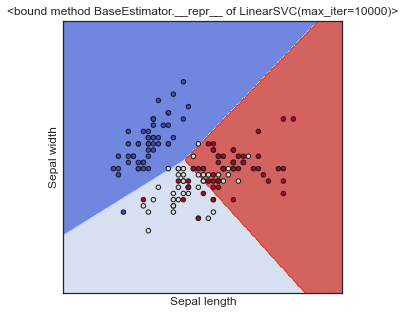

In [7]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

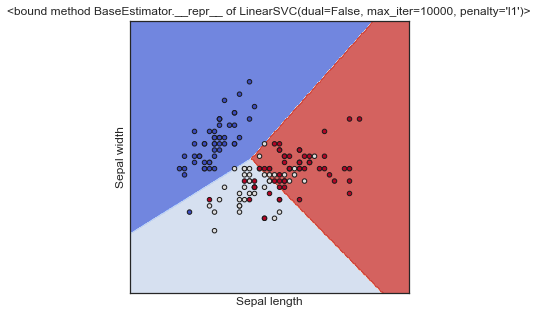

In [8]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

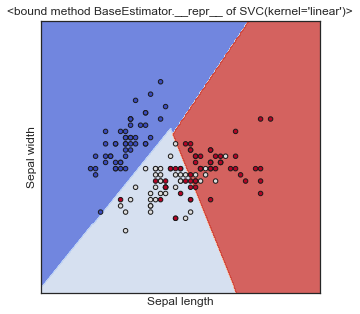

In [9]:
plot_cl(SVC(kernel='linear', C=1.0))

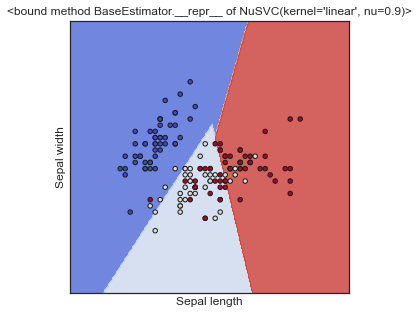

In [10]:
plot_cl(NuSVC(kernel='linear', nu=0.9))

Задача регрессии

In [11]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
boston_x = df_boston['RM'].values
boston_y = df_boston['target'].values

<AxesSubplot:>

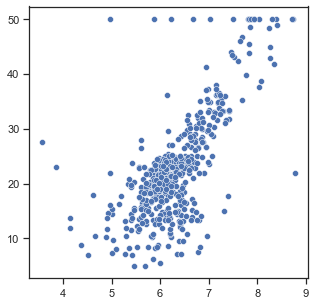

In [12]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=boston_x, y=boston_y)

In [13]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(boston_x.reshape(-1, 1), boston_y)
    boston_y_pred = clf.predict(boston_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(boston_x, boston_y, 'b.')
    ax.plot(boston_x, boston_y_pred, 'ro')
    plt.show()

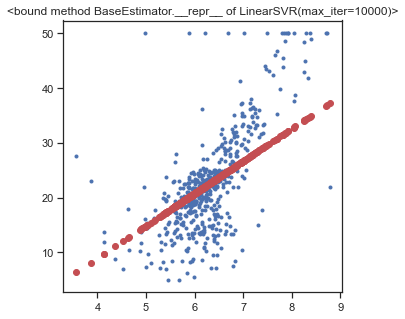

In [14]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

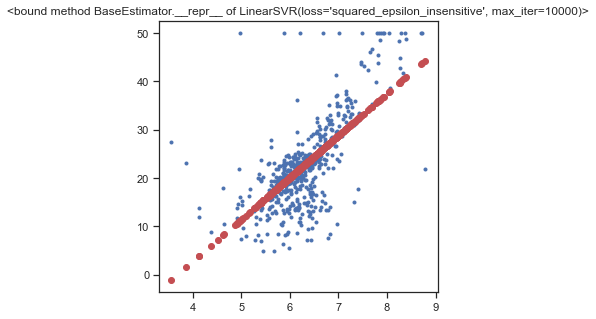

In [15]:
plot_regr(LinearSVR(C=1.0, loss='squared_epsilon_insensitive', max_iter=10000))

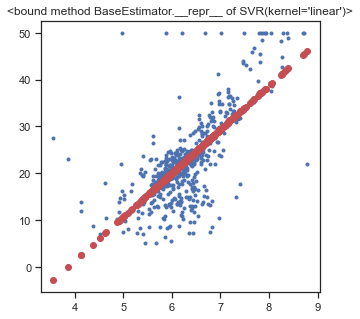

In [16]:
plot_regr(SVR(kernel='linear', C=1.0))

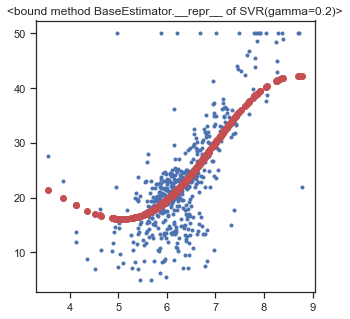

In [17]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

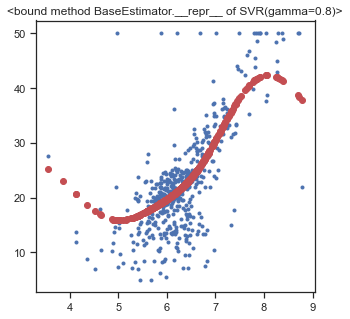

In [18]:
plot_regr(SVR(kernel='rbf', gamma=0.8, C=1.0))

In [19]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [21]:
# Используем датасеты для классификации
iris = load_iris()
wine = load_wine()
iris_x_ds = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_x_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    

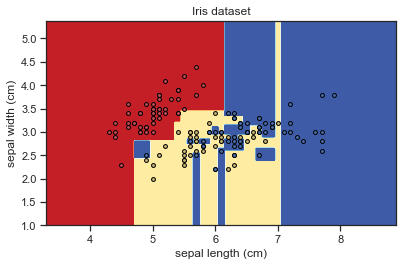

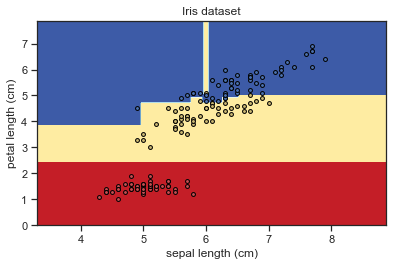

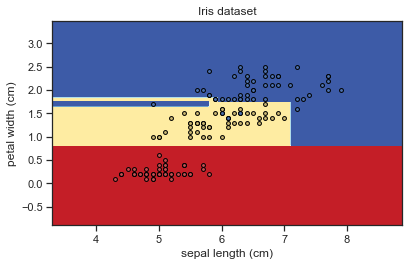

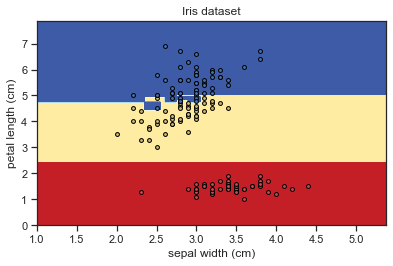

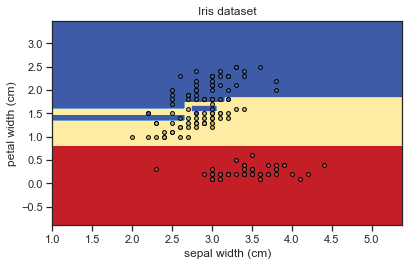

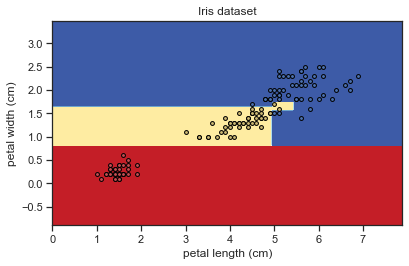

In [23]:
plot_tree_classification('Iris dataset', iris)

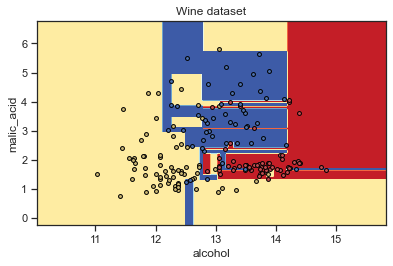

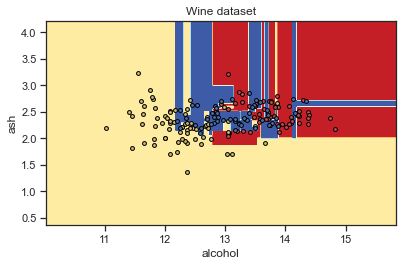

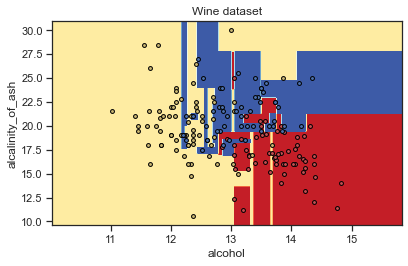

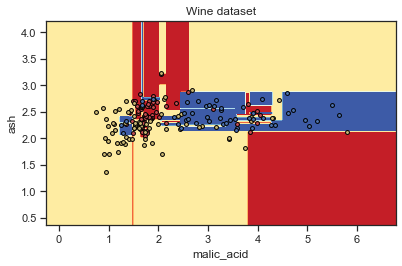

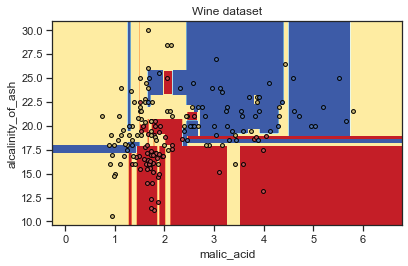

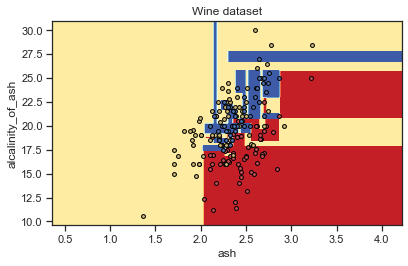

In [24]:
plot_tree_classification('Wine dataset', wine)

In [25]:
# Обучим дерево на всех признаках iris
iris_tree_cl = DecisionTreeClassifier(random_state=1)
iris_tree_cl.fit(iris_x_ds, iris.target)
iris_tree_cl

DecisionTreeClassifier(random_state=1)

In [26]:
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(iris_tree_cl, feature_names=list(iris_x_ds.columns))
HTML('<pre>' + tree_rules + '</pre>')

### Важность признаков

С помощью свойства featureimportances можно получить значение важности признаков.

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева. Чем чаще встречается признак, тем более он важен.

In [37]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [27]:
# Важность признаков
list(zip(iris_x_ds.columns.values, iris_tree_cl.feature_importances_))

[('sepal length (cm)', 0.026666666666666658),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.05072262479871173),
 ('petal width (cm)', 0.9226107085346216)]

In [28]:
# Важность признаков в сумме дает единицу
sum(iris_tree_cl.feature_importances_)

1.0

In [29]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

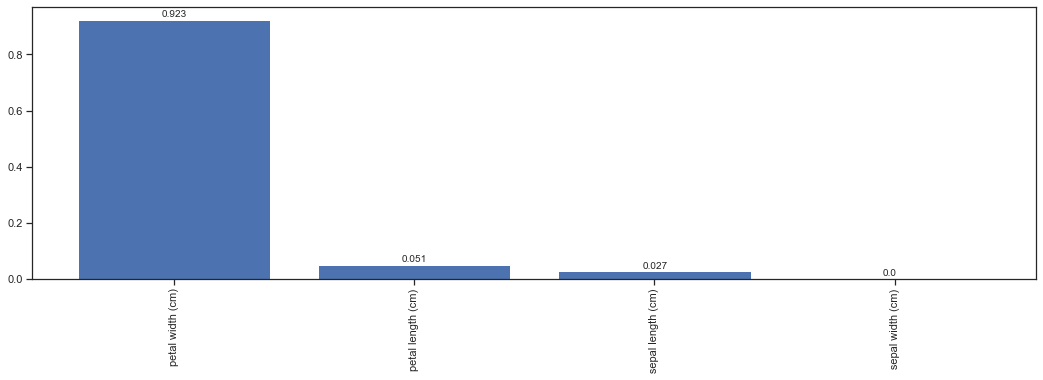

In [30]:
iris_tree_cl_fl, iris_tree_cl_fd = draw_feature_importances(iris_tree_cl, iris_x_ds)

In [31]:
# Список признаков, отсортированный на основе важности, и значения важности
iris_tree_cl_fl, iris_tree_cl_fd

(['petal width (cm)',
  'petal length (cm)',
  'sepal length (cm)',
  'sepal width (cm)'],
 [0.9226107085346216, 0.05072262479871173, 0.026666666666666658, 0.0])

In [32]:
iris_x_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
# Пересортируем признаки на основе важности
iris_x_ds_sorted = iris_x_ds[iris_tree_cl_fl]
iris_x_ds_sorted.head()

,petal width (cm),petal length (cm),sepal length (cm),sepal width (cm)
0,0.2,1.4,5.1,3.5
1,0.2,1.4,4.9,3.0
2,0.2,1.3,4.7,3.2
3,0.2,1.5,4.6,3.1
4,0.2,1.4,5.0,3.6


In [34]:
# Разделим выборку на обучающую и тестовую
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_x_ds_sorted, iris.target, test_size=0.5, random_state=1)
iris_X_train.shape, iris_X_test.shape

((75, 4), (75, 4))

In [35]:
# Обучим дерево и предскажем результаты на всех признаках 
iris_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(iris_X_train, iris_y_train)
iris_y_test_predict = iris_tree_cl_feat_1.predict(iris_X_test)
iris_y_test_predict.shape

(75,)

In [38]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


In [39]:
# Обучим дерево и предскажем результаты на единственном самом важном признаке 
iris_tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(iris_X_train[[iris_tree_cl_fl[0]]], iris_y_train)
iris_y_test_predict_2 = iris_tree_cl_feat_2.predict(iris_X_test[[iris_tree_cl_fl[0]]])
iris_y_test_predict_2.shape

(75,)

In [40]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629
